In [1]:
# import matplotlib as mpl
# matplotlib.style.use('fast')
# matplotlib.use('agg')
import logging

logging.basicConfig(level=logging.INFO)
import shnitsel as st
from shnitsel.vis.datasheet import Datasheet

INFO:rdkit:Enabling RDKit 2025.09.1 jupyter extensions


## Basic datasheet test

In [2]:
from shnitsel.data.shnitsel_db.db_compound_group import CompoundInfo
from shnitsel.data.shnitsel_db_format import ShnitselDB
from shnitsel.data.trajectory_format import Trajectory

shnitsel_db: ShnitselDB = st.io.read('test_data/sharc/traj_I01_v3.0/', parallel=False)  # type: ignore
shnitsel_db.set_compound_info(compound_info=CompoundInfo("I01"), apply_to_all=True)


def set_charges(traj: Trajectory):
    return traj.assign(
        state_charges=(
            'state',
            traj.state_charges.values * 0 + 1,
            traj.state_charges.attrs,
        )
    )


shnitsel_db = shnitsel_db.map_over_trajectories(set_charges)  # type: ignore
shnitsel_db

INFO:root:Could not read `test_data\sharc\traj_I01_v3.0` directly as a trajectory.
INFO:root:Attempt to read `test_data\sharc\traj_I01_v3.0` as a directory containing multiple trajectories.


  0%|          | 0/2 [00:00<?, ?it/s]

INFO:root:Expecting socs in SHARC
INFO:root:For sharc before version 4.0, we will attempt to extract charge data from QM interface settings.
INFO:root:State names already assigned
INFO:root:Trajectory at path test_data\sharc\traj_I01_v3.0\TRAJ_00002 did not complete
INFO:root:Expecting socs in SHARC
INFO:root:For sharc before version 4.0, we will attempt to extract charge data from QM interface settings.
INFO:root:State names already assigned
INFO:root:Trajectory at path test_data\sharc\traj_I01_v3.0\TRAJ_00006 did not complete
INFO:root:Found discrepancies in the following dimensions: []


<xarray.DataTree 'ROOT'>
Group: /
│   Attributes:
│       DataTree_Level:  ShnitselDBRoot
└── Group: /unknown
    │   Attributes:
    │       DataTree_Level:  CompoundGroup
    │       compound_info:   {'compound_name': 'unknown'}
    ├── Group: /unknown/0
    │       Dimensions:              (time: 201, state: 3, atom: 6, direction: 3,
    │                                 statecomb: 3, full_statecomb: 6)
    │       Coordinates: (12/15)
    │         * time                 (time) float64 2kB 0.0 0.5 1.0 1.5 ... 99.0 99.5 100.0
    │         * state                (state) int64 24B 1 2 3
    │         * atom                 (atom) int64 48B 0 1 2 3 4 5
    │         * direction            (direction) <U1 12B 'x' 'y' 'z'
    │         * statecomb            (statecomb) object 24B MultiIndex
    │         * full_statecomb       (full_statecomb) object 48B MultiIndex
    │           ...                   ...
    │           atNames              (atom) <U1 24B 'C' 'N' 'H' 'H' 'H' 'H'
    │           atNums               (atom) int64 48B 6 7 1 1 1 1
    │         * from                 (statecomb) int64 24B 1 1 2
    │         * to                   (statecomb) int64 24B 2 3 3
    │         * full_statecomb_from  (full_statecomb) int64 48B 1 1 2 2 3 3
    │         * full_statecomb_to    (full_statecomb) int64 48B 2 3 1 3 1 2
    │       Data variables:
    │           energy               (time, state) float32 2kB -94.69 -94.38 ... -94.34
    │           forces               (time, state, atom, direction) float32 43kB 0.09112 ...
    │           atXYZ                (time, atom, direction) float32 14kB 0.02999 ... -1.41
    │           nacs                 (time, statecomb, atom, direction) float32 43kB 0.01...
    │           dip_perm             (time, state, direction) float32 7kB -0.002852 ... 1...
    │           dip_trans            (time, statecomb, direction) float32 7kB 0.001566 .....
    │           socs                 (time, full_statecomb) complex128 19kB 0j 0j ... 0j 0j
    │           astate               (time) int32 804B 3 3 3 3 3 3 3 3 3 ... 2 2 2 2 2 2 2 2
    │           sdiag                (time) int32 804B 3 3 3 3 3 3 3 3 3 ... 2 2 2 2 2 2 2 2
    │       Attributes: (12/16)
    │           input_format:           sharc
    │           t_max:                  100.0
    │           delta_t:                0.5
    │           max_ts:                 201
    │           completed:              False
    │           input_type:             dynamic
    │           ...                     ...
    │           has_forces:             True
    │           misc_input_settings:    {'input': {'printlevel': '2', 'geomfile': '"geom"...
    │           trajectory_input_path:  test_data/sharc/traj_I01_v3.0/TRAJ_00002
    │           trajid:                 2
    │           __original_dataset:     <xarray.Dataset> Size: 141kB\nDimensions:        ...
    │           DataTree_Level:         TrajectoryData
    └── Group: /unknown/1
            Dimensions:              (time: 201, state: 3, atom: 6, direction: 3,
                                      statecomb: 3, full_statecomb: 6)
            Coordinates: (12/15)
              * time                 (time) float64 2kB 0.0 0.5 1.0 1.5 ... 99.0 99.5 100.0
              * state                (state) int64 24B 1 2 3
              * atom                 (atom) int64 48B 0 1 2 3 4 5
              * direction            (direction) <U1 12B 'x' 'y' 'z'
              * statecomb            (statecomb) object 24B MultiIndex
              * full_statecomb       (full_statecomb) object 48B MultiIndex
                ...                   ...
                atNames              (atom) <U1 24B 'C' 'N' 'H' 'H' 'H' 'H'
                atNums               (atom) int64 48B 6 7 1 1 1 1
              * from                 (statecomb) int64 24B 1 1 2
              * to                   (statecomb) int64 24B 2 3 3
              * full_statecomb_from  (full_statecomb) int64 48B 1 1 2 2 3 3
  

INFO:root:Found discrepancies in the following dimensions: []
INFO:root:Dimension statecomb is being generated.
INFO:root:cached inter_state in 0.05442189995665103 s
INFO:root:cached spectra in 0.2681124000810087 s
INFO:root:cached spectra_groups in 0.2687465000199154 s
INFO:root:finished plot_separated_spectra_and_hists in 0.626729300012812 s
INFO:root:Dimension atomcomb is being generated.
INFO:root:cached noodle in 0.010801799944601953 s
INFO:root:finished plot_noodle in 0.033028800040483475 s
[00:36:23] WARNING: Proton(s) added/removed

INFO:root:finished plot_structure in 0.02982920000795275 s


C=[NH2+] InChI=1S/CH3N/
c1-2/h2H,1H2/p+1
<xarray.Dataset> Size: 5kB
Dimensions:              (state: 3, frame: 5, atom: 6, direction: 3,
                          statecomb: 3, full_statecomb: 6, trajid: 2)
Coordinates: (12/22)
  * state                (state) int64 24B 1 2 3
  * frame                (frame) object 40B MultiIndex
  * atom                 (atom) int64 48B 0 1 2 3 4 5
  * direction            (direction) <U1 12B 'x' 'y' 'z'
  * statecomb            (statecomb) object 24B MultiIndex
  * full_statecomb       (full_statecomb) object 48B MultiIndex
    ...                   ...
  * trajid_              (frame) int32 20B 2 2 2 6 6
  * time                 (frame) float64 40B 26.0 33.5 45.5 74.5 99.5
    t_max                (trajid) float64 16B 100.0 100.0
    completed            (trajid) bool 2B False False
    delta_t              (trajid) float64 16B 0.5 0.5
    max_ts               (trajid) int32 8B 201 201
Data variables: (12/14)
    energy               (state, frame) 

INFO:root:finished plot_nacs_histograms in 0.5712217999389395 s
INFO:root:cached pops in 0.311602900037542 s
INFO:root:cached delta_E in 2.4016104999464005 s
INFO:root:cached fosc_time in 2.2516797999851406 s


KeyError: "No variable named 'state_names'. Did you mean one of ('statecomb',)?"

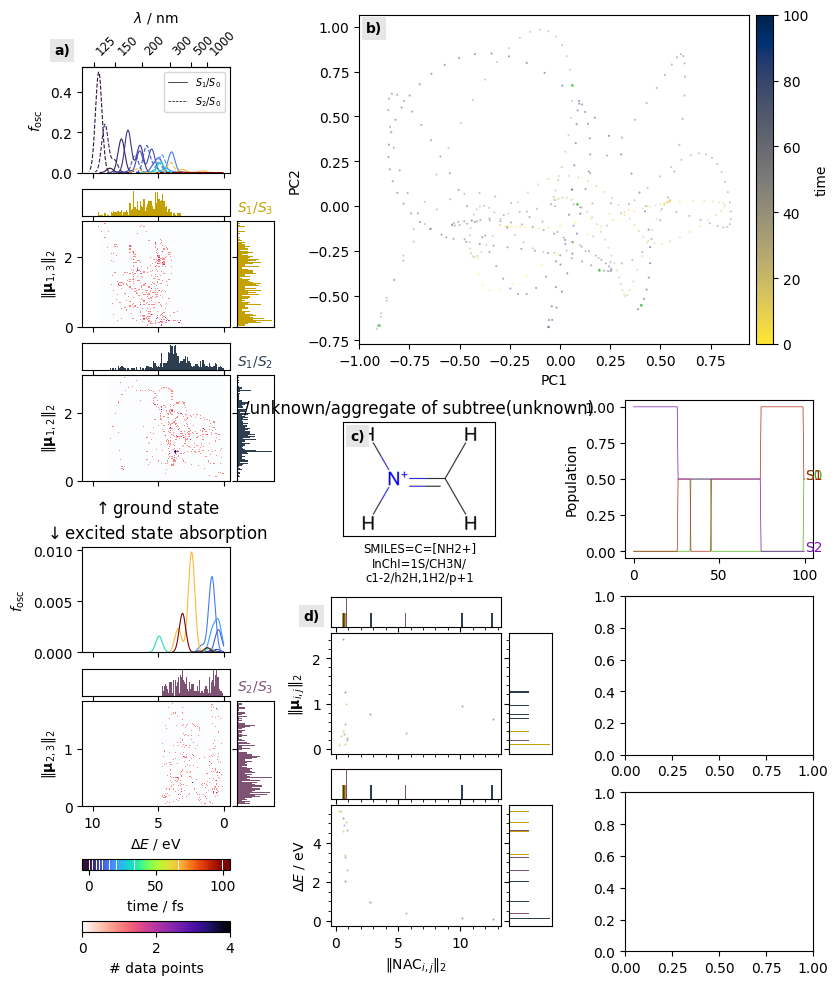

In [3]:
sheet = Datasheet(shnitsel_db)
# sheet.datasheet_pages['root'].charge = 1
sheet.plot()
# sheet.datasheet_pages

In [ ]:
%time sheet.calc_all()

In [ ]:
%time sheet.plot_per_state_histograms()

In [ ]:
%time sheet.plot_timeplots()

In [ ]:
%time sheet.plot_separated_spectra_and_hists()

In [ ]:
%time fig = sheet.plot()

In [ ]:
# fig.savefig('/tmp/ethene.png')

## Alkene datasheets

In [ ]:
from glob import iglob

for path in iglob('/nc/Theo_SHNITSEL/filtered/*.nc'):
    print(path)
    sheet = sh.plot.Datasheet(path=path)
    sheet.plot()

## Methylenimmonium

In [ ]:
sheet = sh.plot.Datasheet(path='/nc/Theo_SHNITSEL/unfiltered/CH2NH2_time.nc')
sheet.charge = 1
sheet.plot()

## Save all datasheets

In [ ]:
import os

os.mkdir('/tmp/datasheets')
os.chdir('/nc/SHNITSEL_databases/dynamic/')
paths = dict(
    I01='I01_ch2nh2_dynamic.nc',
    A01='A01_ethene_dynamic.nc',
    A02='A02_propene_dynamic.nc',
    A03='A03_butene_dynamic.nc',
    R01a='R01a_chd50_dynamic.nc',
    R01b='R01b_chd25_dynamic.nc',
)
for ref, path in paths.items():
    sheet = sh.plot.Datasheet(path=path)
    fig = sheet.plot()
    fig.set_dpi(400)
    fig.savefig(f'/tmp/datasheets/{ref}.pdf')
    fig.savefig(f'/tmp/datasheets/{ref}.png')